In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
%matplotlib inline
from pandas.tools.plotting import autocorrelation_plot

In [2]:
#Data importeren
data = pd.read_excel('data2.xlsx').T

In [6]:
#ARMA (1,1) model Yt = b0*Yt-1 + Et - b1Et-1
m = pd.DataFrame([data['Hw_ret'], data['Hw_ret']]).T

Yt = pd.DataFrame(data['Hw_ret'])
Yt_1 = pd.DataFrame(Yt.Hw_ret.shift(1))
y_matrix = pd.concat([Yt, Yt_1], axis=1)
y_matrix = y_matrix[1:]

EPSt_1 = pd.DataFrame()

#def EPSILONt_1():
#    for i in range (len(data)):
#        EPSt_1 = 

/Users/faisal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


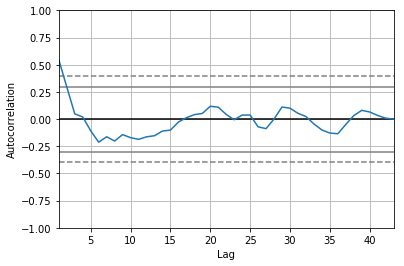

In [7]:
autocorrelation_plot(Yt)
pyplot.show()

In [12]:
model = ARIMA(Yt, order=(3,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/Users/faisal/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/faisal/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.Hw_ret   No. Observations:                   42
Model:                 ARIMA(3, 1, 1)   Log Likelihood                 -42.528
Method:                       css-mle   S.D. of innovations              0.645
Date:                Mon, 11 Feb 2019   AIC                             97.057
Time:                        10:10:21   BIC                            107.483
Sample:                             1   HQIC                           100.878
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0009      0.017      0.052      0.959      -0.033       0.035
ar.L1.D.Hw_ret     0.5837      0.153      3.821      0.000       0.284       0.883
ar.L2.D.Hw_ret     0.1263      0.176

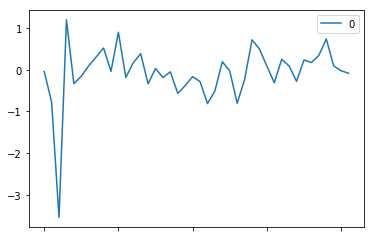

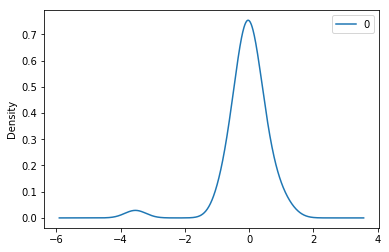

               0
count  42.000000
mean   -0.074565
std     0.698718
min    -3.540392
25%    -0.283726
50%    -0.034574
75%     0.222027
max     1.197625


In [13]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=-0.034798, expected=-0.108320
predicted=-0.052504, expected=-0.432940
predicted=-0.408867, expected=-0.159910
predicted=-0.233133, expected=-0.079410
predicted=-0.114312, expected=0.225280
predicted=0.074622, expected=0.777070


/Users/faisal/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/faisal/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


predicted=0.388980, expected=0.498540
predicted=0.280474, expected=0.243340
predicted=0.012266, expected=-0.082550
Test MSE: 0.096


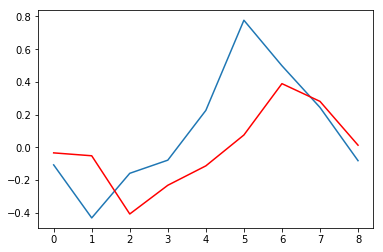

In [15]:
from sklearn.metrics import mean_squared_error

#Prediction

X = Yt.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    
    model = ARIMA(history, order=(3,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
pyplot.rcParams["figure.figsize"] = [20, 8]